In [ ]:
# Bank Marketing Data Science & Machine Learning Project

In [13]:
## Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [14]:
## Step 2: Load Dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')
print(df.shape)
print(df.head())
print(df.info())
print(df['y'].value_counts())

(41188, 21)
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m 

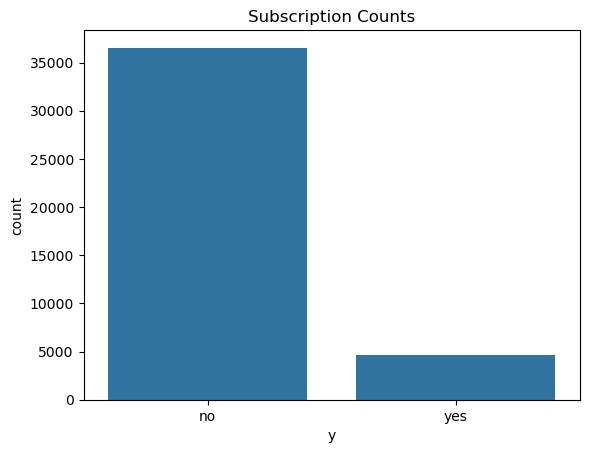

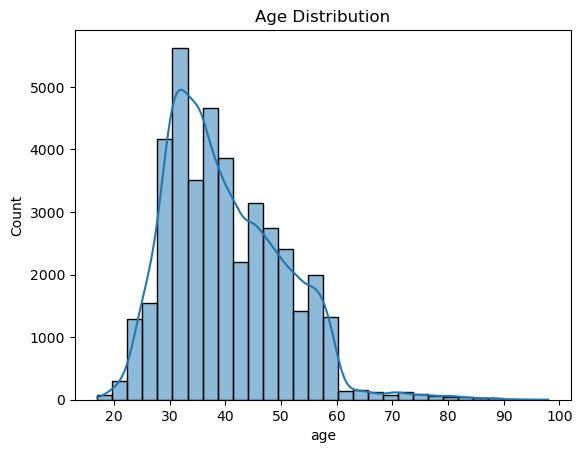

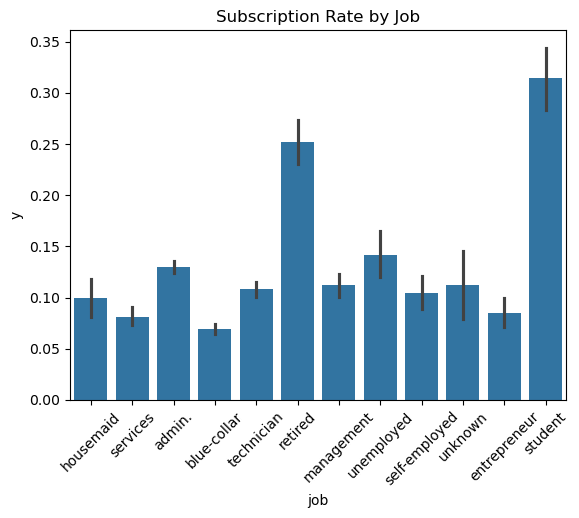

In [15]:
## Step 3: Exploratory Data Analysis (EDA)
sns.countplot(x='y', data=df)
plt.title('Subscription Counts')
plt.show()

sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

sns.barplot(x='job', y=df['y'].apply(lambda x: 1 if x == 'yes' else 0), data=df)
plt.xticks(rotation=45)
plt.title('Subscription Rate by Job')
plt.show()

In [19]:
## Step 4: Data Preprocessing
# Encode target
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])  # yes=1, no=0

In [20]:
# Encode categorical features
df_encoded = pd.get_dummies(df.drop('y', axis=1))
X = df_encoded
y = df['y']

In [21]:
## Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
## Step 6: Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
## Step 7: Evaluate Model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.65      0.45      0.53       935

    accuracy                           0.91      8238
   macro avg       0.79      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238

ROC AUC: 0.7087280079024003


In [26]:
## Step 8: Feature Importance
importances = model.feature_importances_
features = X.columns
sorted_indices = importances.argsort()[::-1]

print("Top Features:")
for i in sorted_indices[:10]:
    print(f"{features[i]}: {importances[i]:.4f}")

Top Features:
duration: 0.2759
euribor3m: 0.0957
age: 0.0790
nr.employed: 0.0481
campaign: 0.0395
pdays: 0.0323
emp.var.rate: 0.0259
cons.conf.idx: 0.0253
cons.price.idx: 0.0224
poutcome_success: 0.0158
